In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train,y_train), (X_test,y_test) = fashion_mnist.load_data()

In [4]:
X_train = X_train/255
X_test = X_test/255

In [5]:
X_train.shape

(60000, 28, 28)

9


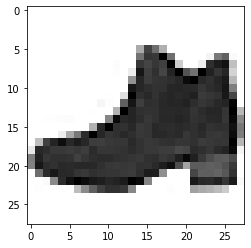

In [6]:
loc = 15
plt.figure()
plt.imshow(X_train[loc],cmap = plt.cm.binary)
print(y_train[loc])

In [7]:
cnn_model = keras.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)), 
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

In [8]:
cnn_model.compile(loss='sparse_categorical_crossentropy',optimizer ="adam",metrics = ['accuracy'])

In [9]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               401664    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [10]:
print(X_train.shape)

(60000, 28, 28)


In [16]:
X_train = X_train.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1,28,28,1))

In [12]:
X_train.shape

(60000, 28, 28, 1)

In [13]:
cnn_model.fit(X_train,y_train,batch_size=250,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 274us/sample - loss: 0.5512 - accuracy: 0.8075
Epoch 2/10
60000/60000 [==============================] - 15s 255us/sample - loss: 0.3534 - accuracy: 0.8751
Epoch 3/10
60000/60000 [==============================] - 16s 274us/sample - loss: 0.3123 - accuracy: 0.8884
Epoch 4/10
60000/60000 [==============================] - 16s 274us/sample - loss: 0.2808 - accuracy: 0.8984
Epoch 5/10
60000/60000 [==============================] - 16s 259us/sample - loss: 0.2626 - accuracy: 0.9050
Epoch 6/10
60000/60000 [==============================] - 18s 294us/sample - loss: 0.2397 - accuracy: 0.9134
Epoch 7/10
60000/60000 [==============================] - 17s 281us/sample - loss: 0.2255 - accuracy: 0.9171
Epoch 8/10
60000/60000 [==============================] - 16s 269us/sample - loss: 0.2136 - accuracy: 0.9219
Epoch 9/10
60000/60000 [==============================] - 16s 265us/sample - loss: 0.2039 - accuracy: 0.9

In [17]:
final_accuracy = cnn_model.evaluate(X_test,y_test,verbose=1)

10000/10000 [==============================] - 1s 130us/sample - loss: 0.2745 - accuracy: 0.9012
